In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow import keras
from sklearn.model_selection import train_test_split, KFold
from sklearn.preprocessing import MinMaxScaler
from sklearn.pipeline import Pipeline
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.wrappers.scikit_learn import KerasRegressor


In [ ]:
dataset = pd.read_csv("/content/drive/MyDrive/LDS8_Le Quang Anh Tu/week2/Chapter3/cars.csv", delimiter=",", header=None)
dataset.head()

,0,1,2,3,4,5
0,28,0,23,0,4099,620
1,26,0,27,0,2677,1792
2,30,1,58,41576,6215,27754
3,26,1,25,43172,7626,28256
4,20,1,17,6979,8071,4438


In [ ]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 963 entries, 0 to 962
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   0       963 non-null    int64
 1   1       963 non-null    int64
 2   2       963 non-null    int64
 3   3       963 non-null    int64
 4   4       963 non-null    int64
 5   5       963 non-null    int64
dtypes: int64(6)
memory usage: 45.3 KB


In [ ]:
X = dataset.iloc[:,0:5]
y = dataset.iloc[:,5]

In [ ]:
y.shape

(963,)

In [ ]:
y = np.reshape(np.array(y), (-1,1))
y.shape

(963, 1)

In [ ]:
scaler = MinMaxScaler()
scaler.fit(X)
scaler.fit(y)

MinMaxScaler(copy=True, feature_range=(0, 1))

In [1]:
x_scale = scaler.transform(X)
y_scale = scaler.transform(y)

NameError: ignored

In [ ]:
#build model
model = Sequential()

model.add(Dense(units=12, input_dim = 5, kernel_initializer='normal', activation='relu'))
model.add(Dense(8, activation='relu'))
model.add(Dense(1, activation='linear'))
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 12)                72        
_________________________________________________________________
dense_1 (Dense)              (None, 8)                 104       
_________________________________________________________________
dense_2 (Dense)              (None, 1)                 9         
Total params: 185
Trainable params: 185
Non-trainable params: 0
_________________________________________________________________


In [ ]:
model.compile(loss='mse', optimizer='adam', metrics=['mse', 'mae'])
#fit model
history = model.fit(x_scale, y_scale, epochs=150, batch_size=32, validation_split=0.2)

Epoch 1/150
25/25 [==============================] - 0s 8ms/step - loss: 0.1718 - mse: 0.1718 - mae: 0.3169 - val_loss: 0.1338 - val_mse: 0.1338 - val_mae: 0.2757
Epoch 2/150
25/25 [==============================] - 0s 3ms/step - loss: 0.1018 - mse: 0.1018 - mae: 0.2441 - val_loss: 0.0707 - val_mse: 0.0707 - val_mae: 0.2144
Epoch 3/150
25/25 [==============================] - 0s 3ms/step - loss: 0.0560 - mse: 0.0560 - mae: 0.2069 - val_loss: 0.0423 - val_mse: 0.0423 - val_mae: 0.1841
Epoch 4/150
25/25 [==============================] - 0s 4ms/step - loss: 0.0415 - mse: 0.0415 - mae: 0.1824 - val_loss: 0.0356 - val_mse: 0.0356 - val_mae: 0.1675
Epoch 5/150
25/25 [==============================] - 0s 3ms/step - loss: 0.0364 - mse: 0.0364 - mae: 0.1675 - val_loss: 0.0311 - val_mse: 0.0311 - val_mae: 0.1545
Epoch 6/150
25/25 [==============================] - 0s 3ms/step - loss: 0.0319 - mse: 0.0319 - mae: 0.1551 - val_loss: 0.0276 - val_mse: 0.0276 - val_mae: 0.1425
Epoch 7/150
25/25 [===

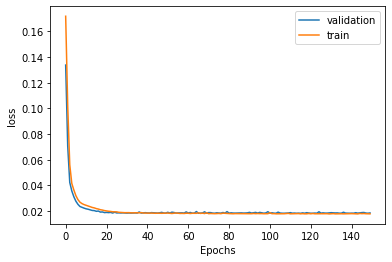

In [ ]:
plt.figure()
plt.plot(history.history['val_loss'])
plt.plot(history.history['loss'])
plt.xlabel('Epochs')
plt.ylabel('loss')
plt.legend(['validation','train'])
plt.show()

In [ ]:
print('Evaluate on test data')
results = model.evaluate(x_scale, y_scale)
print('loss, mse, mae', results)

Evaluate on test data
31/31 [==============================] - 0s 2ms/step - loss: 0.0178 - mse: 0.0178 - mae: 0.0969
loss, mse, mae [0.01782725192606449, 0.01782725192606449, 0.09691666811704636]


In [ ]:
#prediction
X_new = np.array([[40,0,26,9000, 8500]])
X_new = scaler.transform(X_new)
y_new = model.predict(X_new)
y_new = scaler.inverse_transform(y_new)
print(y_new)

[[13068.79]]
